In [2]:
import matplotlib.pyplot as plt
import numpy as np

dataset = np.load("../val.npz", allow_pickle=True)

In [25]:
cond_states = dataset["cond_states"].squeeze()
images = dataset["images"].squeeze().astype(np.uint8)
true_cond_states = dataset["true_cond_states"].squeeze()
true_images = dataset["true_images"].squeeze().astype(np.uint8)

In [26]:
true_images.shape

(2, 60, 3, 192, 192)

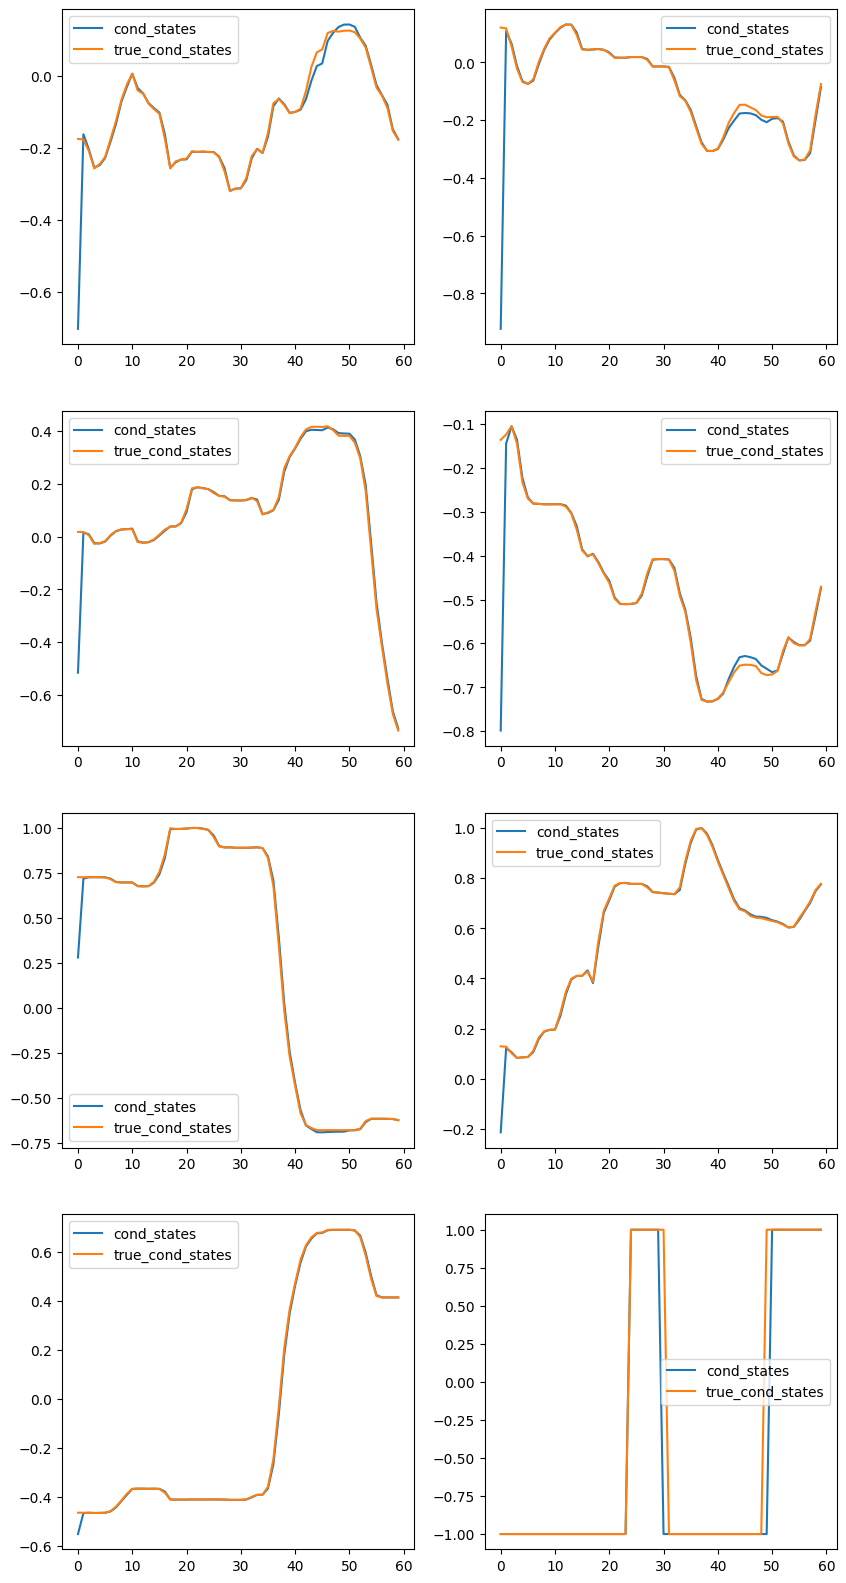

In [12]:
fig, axs = plt.subplots(4, 2, figsize=(10, 20))
for i in range(8):
    ax = axs[i // 2, i % 2]
    ax.plot(cond_states[:, i], label="cond_states")
    ax.plot(true_cond_states[:, i], label="true_cond_states")
    ax.legend()
plt.show()

In [13]:
import numpy as np
from IPython.display import HTML
from matplotlib.animation import FuncAnimation


def display_sequence_of_images_in_notebook(images, title=None):
    """
    Displays a sequence of images as a video or GIF in a Jupyter Notebook.

    Parameters:
    - images: A list or numpy array of images (shape: [frames, channels, height, width]).
    - title: (Optional) Title of the animation.
    """
    fig, ax = plt.subplots()
    if title:
        ax.set_title(title)
    ax.axis("off")

    # Initialize with the first image
    im = ax.imshow(
        images[0].transpose(1, 2, 0)
    )  # Assuming images are [channels, height, width]

    # Function to update the image for each frame
    def update(i):
        im.set_data(images[i].transpose(1, 2, 0))
        return (im,)

    # Create the animation
    anim = FuncAnimation(fig, update, frames=np.arange(0, len(images)), interval=100)

    # Close the figure to prevent duplicate display
    plt.close(fig)

    # Return HTML representation of the video
    return HTML(anim.to_html5_video())  # Use anim.to_jshtml() for an alternative


# display_sequence_of_images_in_notebook(eval_images[2,:50,0,1]+0.5, title='Eval Images')

In [31]:
display_sequence_of_images_in_notebook(true_images[1, :50], title="Images")

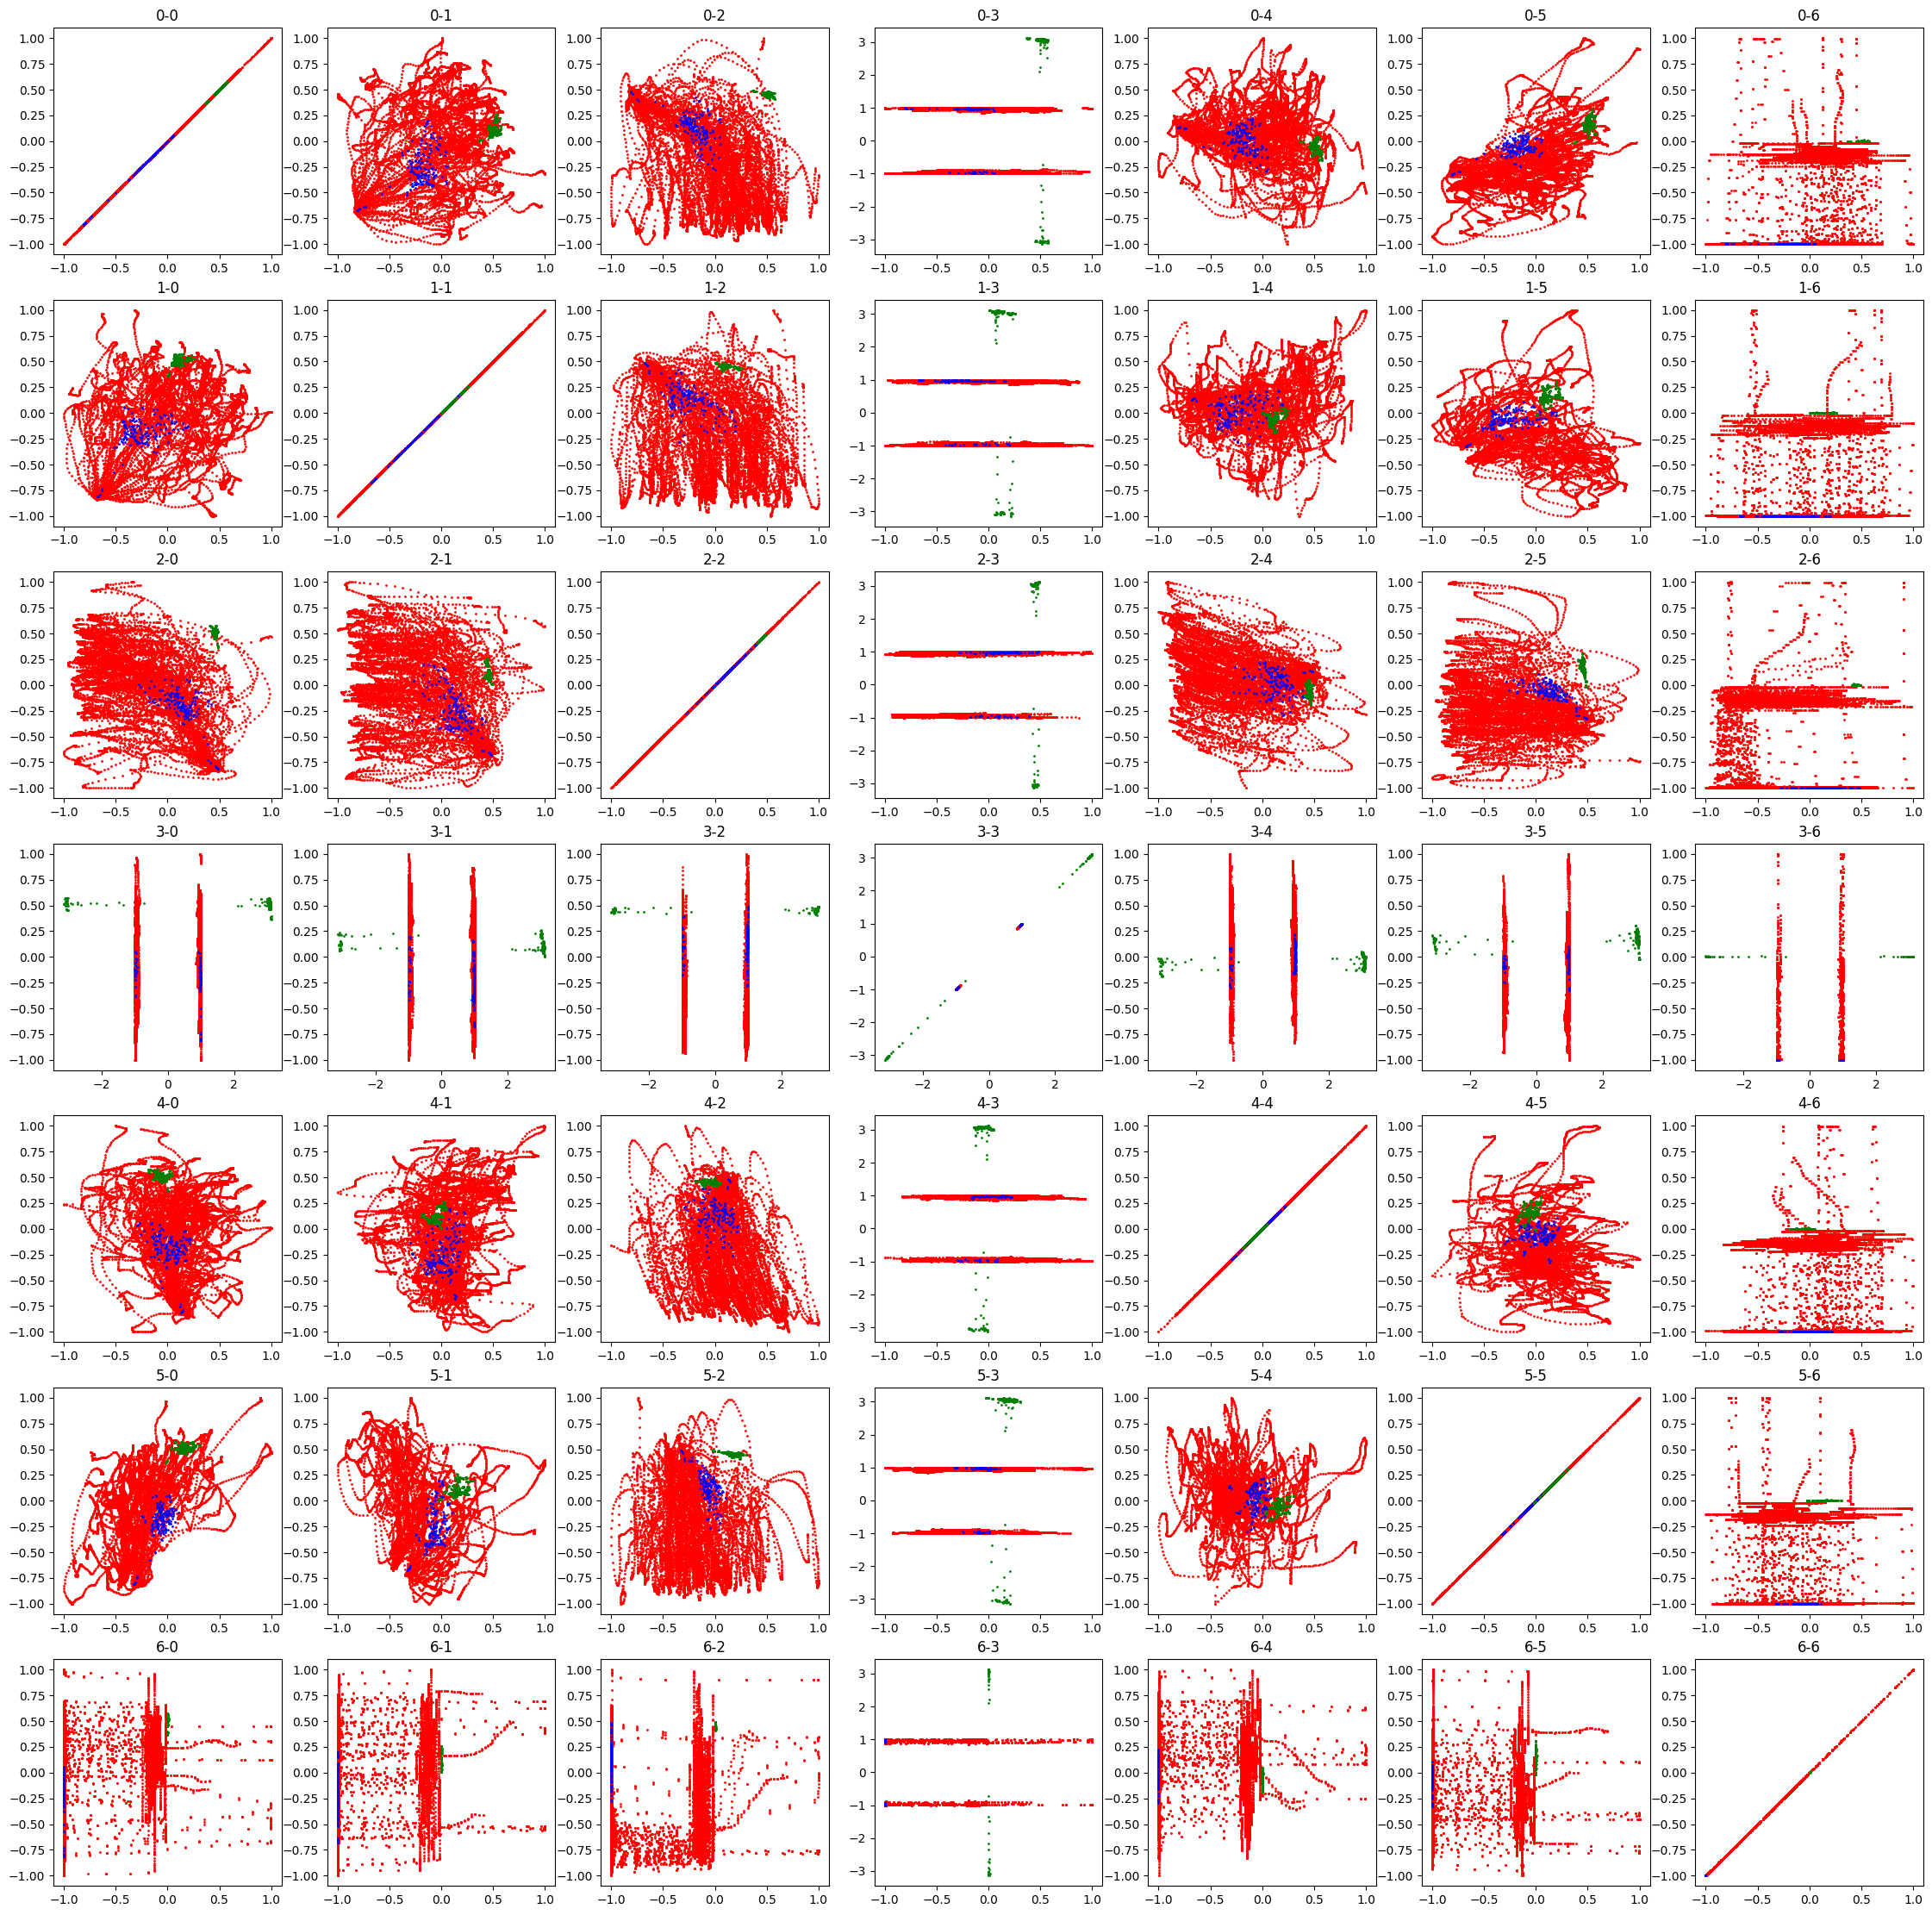

In [25]:
# Plot each dimension of the obs in a separate subplot in a single figure
fig, axs = plt.subplots(7, 7, figsize=(28, 28))
for i in range(7):
    for j in range(7):
        # Scatter the training data in red and eval data in blue
        axs[i % 7, j % 7].scatter(train_obs[:, i], train_obs[:, j], c="r", s=1)
        axs[i % 7, j % 7].scatter(
            eval_obs.reshape(-1, 7)[:, i], eval_obs.reshape(-1, 7)[:, j], c="b", s=1
        )
        # axs[i % 7, j % 7].scatter(eval_actions.reshape(-1,7)[:,i], eval_actions.reshape(-1,7)[:,j], c='g', s=1)
        axs[i % 7, j % 7].set_title(f"{i}-{j}")
plt.show()

0.0


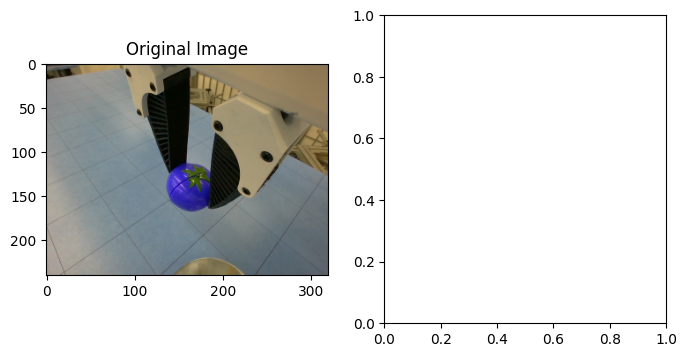

In [28]:
# Plot a image in np.ndarray format
images_0 = train_images["3"][200] / 255 - 0.5

fig, axs = plt.subplots(1, 2, figsize=(8, 4))
axs[0].imshow(images_0.transpose(1, 2, 0) + 0.5)
axs[0].set_title("Original Image")
print(((images_0 + 0.5) * 255).min())

In [30]:
unnorm_stats = np.load("/home/lab/droid/traj_data/norm_no_vel_3.npz")
obs_min = unnorm_stats["obs_min"]
obs_max = unnorm_stats["obs_max"]
action_min = unnorm_stats["action_min"]
action_max = unnorm_stats["action_max"]


def normlize_action(action):
    return (action - action_min) / (action_max - action_min + 1e-6) * 2 - 1


def unnormalize_action(action):
    return (action + 1) * (action_max - action_min + 1e-6) / 2 + action_min


def normalize_obs(obs):
    return (obs - obs_min) / (obs_max - obs_min + 1e-6) * 2 - 1


def unnormalize_obs(obs):
    return (obs + 1) * (obs_max - obs_min + 1e-6) / 2 + obs_min


def preprocess_img(img):
    assert img.max() > 5, img.max()
    img = img / 255.0 - 0.5
    return img

In [3]:
diff_actions = np.load(
    "/home/lab/droid/diffusion_policy/data/outputs/2024.11.01/15.43.03_train_diffusion_unet_image_real_image/output/actions.npy"
)
diff_states = np.load(
    "/home/lab/droid/diffusion_policy/data/outputs/2024.11.01/15.43.03_train_diffusion_unet_image_real_image/output/states.npy"
)
print(diff_actions.shape)
print(diff_states.shape)

# Plot each dimension of the obs in a separate subplot in a single figure
fig, axs = plt.subplots(4, 2, figsize=(8, 8))
actions_to_plot = diff_actions[:, 0]
obs_to_plot = diff_states.reshape(-1, 7)
for i in range(7):
    # Scatter the training data in red and eval data in blue
    axs[i % 4, i // 4].scatter(obs_to_plot[:, 0], obs_to_plot[:, i], c="r", s=1)
    axs[i % 4, i // 4].scatter(actions_to_plot[:, 0], actions_to_plot[:, i], c="b", s=1)
    axs[i % 4, i // 4].set_title(f"Obs {i}")
plt.show()

In [15]:
# import pretty_errors
import logging
import math
import os

import hydra
from omegaconf import OmegaConf

# # allows arbitrary python code execution in configs using the ${eval:''} resolver
OmegaConf.register_new_resolver("eval", eval, replace=True)
OmegaConf.register_new_resolver("round_up", math.ceil)
OmegaConf.register_new_resolver("round_down", math.floor)

# suppress d4rl import error
os.environ["D4RL_SUPPRESS_IMPORT_ERROR"] = "1"

# add logger
log = logging.getLogger(__name__)

cfg = OmegaConf.load(
    "/home/lab/droid/guided-data-collection/guided_dc/diffusion/cfg/real/val/pick_and_place/val_diffusion_unet_img.yaml"
)

cfg["gpu_id"] = 0

# Initialize and run the agent
cls = hydra.utils.get_class(cfg._target_)
agent = cls(cfg)

Device:  cuda:0


In [21]:
train_dataset["traj_lengths"]

array([268, 211, 218])

In [46]:
display_sequence_of_images_in_notebook(
    train_images["0"][268 + 211 : 268 + 211 + 218] / 255, title="Train Images"
)

In [48]:
train_obs_unnorm = unnormalize_obs(train_obs)
# gripper_pos = np.stack(gripper_pos)

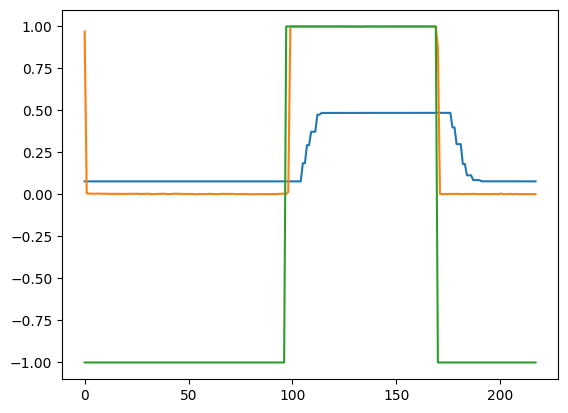

In [54]:
plt.plot(train_obs_unnorm[268 + 211 : 268 + 211 + 218, -1])
# plt.plot(gripper_pos[:, 0])
plt.plot(train_dataset["actions"][268 + 211 : 268 + 211 + 218, -1])

In [55]:
robot_states = np.load(
    "/home/lab/droid/guided-data-collection/guided_dc/diffusion/log/real_pick_and_place/pick_and_place_eval_diffusion_unet_img_ta8_td100/2024-11-20_20-17-06_42/robot_states_79.npy"
)
eval_actions = np.load(
    "/home/lab/droid/guided-data-collection/guided_dc/diffusion/log/real_pick_and_place/pick_and_place_eval_diffusion_unet_img_ta8_td100/2024-11-20_20-17-06_42/actions_79.npy"
)

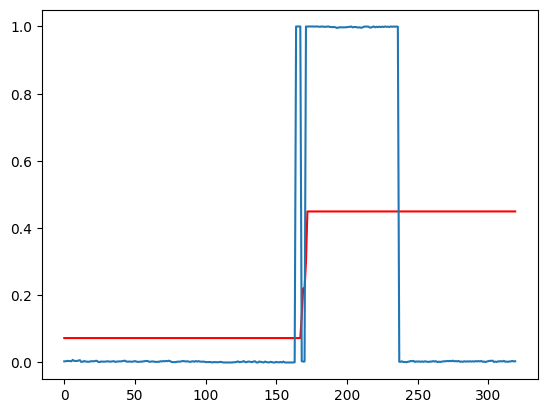

In [64]:
plt.plot(robot_states[1:, -1], c="r")
plt.plot(eval_actions.reshape(-1, 7)[:, -1])

4


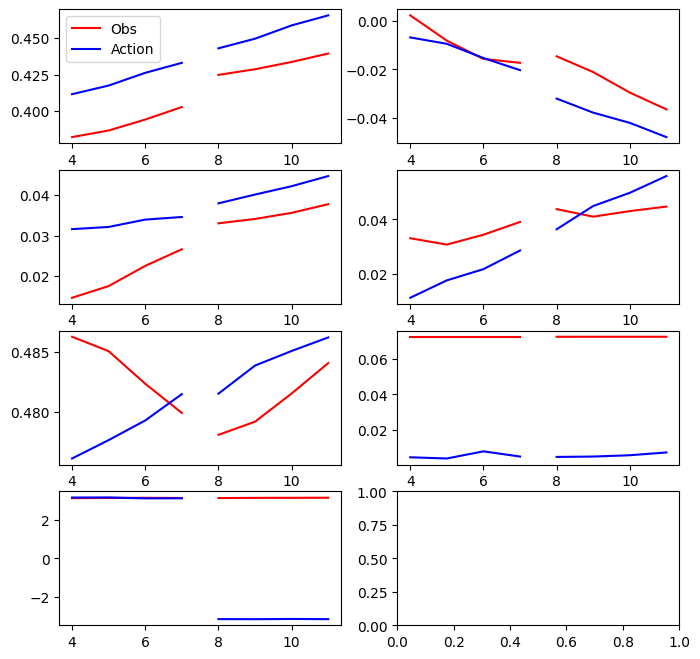

In [56]:
fig, axs = plt.subplots(4, 2, figsize=(8, 8))
i = 1
chunk_size = eval_actions.shape[1]
print(chunk_size)
for j in range(7):
    chunk1 = list(range(chunk_size * i, chunk_size * (i + 1)))
    chunk2 = list(range(chunk_size * (i + 1), chunk_size * (i + 2)))

    axs[j % 4, j // 4].plot(
        chunk1,
        robot_states[chunk_size * i + 1 : chunk_size * (i + 1) + 1, j],
        c="r",
        label="Obs",
    )
    axs[j % 4, j // 4].plot(
        chunk2,
        robot_states[chunk_size * (i + 1) + 1 : chunk_size * (i + 2) + 1, j],
        c="r",
    )

    axs[j % 4, j // 4].plot(chunk1, eval_actions[i, :, j], c="b", label="Action")
    axs[j % 4, j // 4].plot(chunk2, eval_actions[i + 1, :, j], c="b")

axs[0, 0].legend()
plt.show()

In [47]:
from collections import namedtuple

import torch

Batch = namedtuple("Batch", "actions conditions")

agent.model.eval()

losses = []
gripper_pos = []
for i in range(268 + 211, 268 + 211 + 218):
    # Prepare input conditions
    cond = {}
    cond["state"] = (
        torch.from_numpy(train_obs[i - 1 : i + 1]).to(agent.device).float()[None, :]
    )
    assert cond["state"].shape == (1, 2, 8)
    cond["rgb"] = {}
    for idx in ["0", "2", "3"]:
        cond["rgb"][idx] = (
            torch.from_numpy(train_images[idx][i - 1 : i + 1]).to(agent.device) / 255
            - 0.5
        )
        cond["rgb"][idx] = cond["rgb"][idx].float().unsqueeze(0)
        assert cond["rgb"][idx].shape == (1, 2, 3, 240, 320)

    # true_action_unnormed = eval_actions[i]
    # true_action_normed = normlize_action(true_action_unnormed, agent.action_min, agent.action_max)
    # true_action_normed = torch.from_numpy(true_action_normed).to(agent.device).float().unsqueeze(0)

    true_action_normed = (
        torch.from_numpy(train_dataset["actions"][i : i + 8][None, :])
        .to(agent.device)
        .float()
    )
    true_action_unnormed = unnormalize_action(true_action_normed.cpu().numpy())

    batch = Batch(actions=true_action_normed, conditions=cond)
    # los = agent.model.loss(*batch)
    # losses.append(los.item())

    predicted_action_normed = (
        agent.model.forward(cond=batch.conditions, deterministic=True)[0].cpu().numpy()
    )
    predicted_action_unnormed = unnormalize_action(predicted_action_normed)

    gripper_pos.append(predicted_action_unnormed[0, :, -1])

    # fig, axs = plt.subplots(4, 2, figsize=(8, 8))
    # for j in range(7):
    #     # Scatter the training data in red and eval data in blue
    #     predicted_action_seq = predicted_action_unnormed[0,:,j]
    #     true_action_seq = true_action_unnormed[0,:,j]
    #     # true_obs_seq = np.concatenate([[unnomred_obs[i,0,0,j]], [unnomred_obs[i,0,1,j]], unnomred_obs[i+1:i+9, 0, 1, j]])
    #     # true_obs_seq = robot_states[8*i+1:8*(i+1)+1, j]

    #     axs[j % 4, j // 4].plot(predicted_action_seq, c='r', label='Predicted')
    #     axs[j % 4, j // 4].plot(true_action_seq, c='b', label='True')
    #     # axs[j % 4, j // 4].plot(true_obs_seq, c='g', label='True Obs', linestyle='dashed')
    #     axs[j % 4, j // 4].set_title(f"Obs {j}")
    # axs[0,0].legend()
    # plt.show()
    # break